# Clases

Tal como las funciones se definen a traves del comando `def`, las clases se definen con el comando `class` de la siguiente manera: 



In [61]:
import numpy as np

In [1]:
class MyClass:
  pass 

Cuando definimos una clase, se nos crea un objeto de tipo clase, el que nos permite hacer instancias de objetivos de dicha clase. Todos las instancias de una clase compartiran **atributos** y **metodos**. 

In [2]:
class Persona:
  def respirar(self):
    return "Sigh"

Creamos una instancia de la clase `Persona`

In [3]:
Tamara = Persona()

In [4]:
Tamara.respirar()

'Sigh'

In [5]:
Lucas = Persona()

In [6]:
Lucas.respirar()

'Sigh'

In [7]:
class Perro:
    def ladrar(self):
        return "Guau"

In [8]:
Spike = Perro()

In [9]:
Spike.ladrar()

'Guau'

In [10]:
Spike.respirar()

AttributeError: 'Perro' object has no attribute 'respirar'

In [11]:
Tamara.ladrar()

AttributeError: 'Persona' object has no attribute 'ladrar'

Los metodos son funciones dentro de una clase y se definen tal y como una funcion, con la excepcion de que reciben siempre como atributo `self` (este atributo se asocia luego a cada instancia).

## Constructor

Las clases tienen algunos metodos especiales, los cuales comienzan con `__`. Un ejemplo es el constructor: `__init__()`. Esta funcion se llama automaticamente cuando se instancia un objeto de esta clase.

In [12]:
class Persona:
  def __init__(self, Nombre, Edad):
    self.nombre = Nombre
    self.edad = Edad

  def respirar(self):
    return "Sigh"

  def saludar_a(self, nombre):
    return "{} dice: Hola {}".format(self.nombre, nombre)

In [13]:
Lucas = Persona()

TypeError: __init__() missing 2 required positional arguments: 'Nombre' and 'Edad'

Ahora nos dice que para instanciar un objeto de la clase `Persona`, se necesitan los atirbutos `nombre` y `edad`. 

In [14]:
Lucas = Persona("Lucas", 26)

In [15]:
print(Lucas.nombre)
print(Lucas.edad)

Lucas
26


In [16]:
Tamara = Persona("Tamara", 26)

In [18]:
print(Tamara.nombre)
print(Tamara.edad)

Tamara
26


In [19]:
Tamara.saludar_a("Pablo")

'Tamara dice: Hola Pablo'

In [20]:
Lucas.saludar_a("Tamara")

'Lucas dice: Hola Tamara'

In [26]:
class Persona:
  def __init__(self, Nombre, Edad):
    self.nombre = Nombre
    self.edad = Edad

  def respirar(self):
    return "Sigh"

  def saludar_a(self, Person_2):
    return "{} dice: Hola {}".format(self.nombre, Person_2.nombre)

In [27]:
Pablo = Persona("Pablo", 22)

In [23]:
Pablo.saludar_a("Tamara")

AttributeError: 'str' object has no attribute 'nombre'

In [24]:
Tamara = Persona("Tamara", 26)

In [25]:
Pablo.saludar_a(Tamara)

'Pablo dice: Hola Tamara'

Veamos un ejemplo mas adecuado para el caso de este magister: una clase que define el algoritmo Perceptron.

In [1]:
import numpy as np

In [43]:
x = ["perro",2, "gato"]
y = ["a", "b", "c", "d", 5]

In [47]:
list(zip(x,y))

[('perro', 'a'), (2, 'b'), ('gato', 'c')]

In [46]:
for i in range(len(y)):
    print(x[i], y[i])

perro a
2 b
gato c


IndexError: list index out of range

In [40]:
for i,x in enumerate(y):
    print(i,x)

0 a
1 b
2 c


In [64]:
class Perceptron:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
    
    def fit(self, data, labels, max_iter=100):
        self.weights = np.zeros(1 + data.shape[1]) #Inicializo los pesos en 0
        for iter in range(max_iter):
            previous_weights = np.copy(self.weights)
            for x,y in zip(data,labels):
                prediction = self.predict_row(x)
                self.weights[1:] += self.learning_rate * (y - prediction) * x #actualizar vector de pesos
                self.weights[0] += self.learning_rate * (y - prediction) # intercepto
            if (previous_weights == self.weights).all(): #convergence, no need to keep training
                return 
        
    def predict_row(self, data):
        suma = np.dot(data, self.weights[1:]) + self.weights[0]
        if suma > 0:
            return 1
        else:
            return 0
    

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
data = pd.read_csv("data1 - data1.csv")

In [67]:
data.head()

,x,y,label
0,-2.6,-0.1,0
1,0.5,-4.8,1
2,3.0,3.4,1
3,-2.6,0.6,0
4,2.1,-1.3,1


<AxesSubplot:xlabel='x', ylabel='y'>

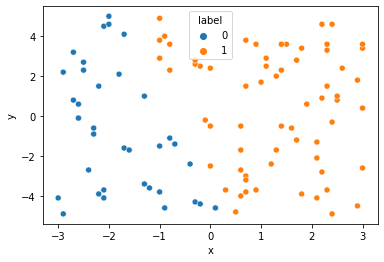

In [68]:
sns.scatterplot(data=data, x="x", y="y", hue="label")

In [69]:
clasificador = Perceptron()

In [70]:
X = data[["x", "y"]]
y = data[["label"]]

In [71]:
y

,label
0,0
1,1
2,1
3,0
4,1
...,...
95,0
96,1
97,0
98,0


In [72]:
clasificador.fit(X.values, y.values)

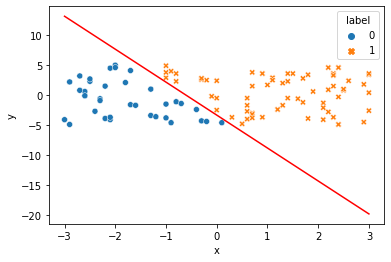

In [81]:
X_plot = np.linspace(-3,3,2)
y_plot = -1*(clasificador.weights[1]*X_plot + clasificador.weights[0])/clasificador.weights[2]

## AX+BY+C --> Y = (-AX - C)/B 

ax = sns.scatterplot(data=data, x="x", y="y", style="label", hue='label')
plt.plot(X_plot, y_plot, color='r') #Grafico de la linea de perceptron
plt.show()

In [82]:
X.values[1]

array([ 0.5, -4.8])

In [83]:
y.values[1]

array([1], dtype=int64)

In [84]:
clasificador.predict_row(X.values[1])

1

## Problema propuesto

In [11]:
class Perceptron:
  def __init__(self, learning_rate=0.01):
    self.learning_rate = learning_rate

  def fit(self, data, labels, max_iter=100):
    self.weights = np.zeros(1 + data.shape[1]) #Inicializo los pesos en 0
    for iter in range(max_iter):
      previous_weights = np.copy(self.weights)
      for x,y in zip(data,labels):
        prediction = self.predict_row(x)
        self.weights[1:] += self.learning_rate * (y - prediction) * x #actualizar vector de pesos
        self.weights[0] += self.learning_rate * (y - prediction) #umbral
      if (previous_weights == self.weights).all(): #convergence, no need to keep training
        return 

  def predict_row(self, row):
    suma = np.dot(row, self.weights[1:]) + self.weights[0]
    if suma > 0:
      return 1
    else:
      return 0

  def predict(self, data):
    ## Implemente este metodo, que recibe un arreglo 2d de puntos [[x1,y1], ..., [xn,yn]]
    ## y retorna un lista con las predicciones para cada uno [pred1, pred2, ..., predn]
    predictions = []
    for row in data:
        pred_row = self.predict_row(row)
        predictions.append(pred_row)
    return predictions

Todos los metodos de una clase son funciones exclusivas para objetos de esa clase. Podemos tener multiples instancias de objetos de la misma clase. Se pueden preguntar que significa el "self" en los metodos de mas arriba: el self es la propia instancia. Con el ejemplo de la clase Persona queda mas claro. 

# Programacion funcional

Veremos las funciones


*   map
*   reduce
*   filter
*   lambda



## La funcion map, recibe una funcion y un iterable (lista, tupla) y le aplica la funcion a cada una de las componentes del iterable

In [85]:
def lowercase(string):
    return string.lower()

palabras = ["Hola", "TAMARA", "LuCaS"]

map(lowercase, palabras)

In [91]:
for x in map(lowercase, palabras):
    print(x)

hola
tamara
lucas


In [86]:
list(map(lowercase, palabras))

['hola', 'tamara', 'lucas']

In [87]:
palabras_lowercase = [s.lower() for s in palabras]

In [89]:
palabras_lowercase

['hola', 'tamara', 'lucas']

In [88]:
palabras_lowercase == list(map(lowercase, palabras))

True

In [ ]:

#  map(funcion, lo_que_sea)
# for x in lo_que_sea:
#    funcion(x)

## Reduce

La funcion reduce se usa para aplicar una funcion que recibe un iterable como input. A diferencia de map, reduce entrega un unico resultado. 

In [90]:
from functools import reduce 

In [92]:
def suma(a,b):
    return a+b

numeros = [2,4,7,8,9]
print(reduce(suma, numeros))

30


## Lambda 

Una funcion lambda es una funcion normalmente pequeña y es anonima, puede tomar cualquier numero de atributos como input. 

In [93]:
x = lambda a: a*5

In [94]:
print(x(5))

25


Ok, pero cuando podriamos querer usar una lambda? Un ejemplo es cuando queremos definir una funcion dentro de otra

In [95]:
numeros = [2,4,7,8,9]
reduce(lambda a,b: a+b, numeros)

30

In [96]:
list(map(lambda a: a*2, numeros))

[4, 8, 14, 16, 18]

## Filter

La funcion filter se usa para filtrar los  elementos de un iterable

In [98]:
numeros

[2, 4, 7, 8, 9]

In [99]:
## Una funcion que filtra los elementos pares

list(filter(lambda x: x%2 == 0, numeros))

[2, 4, 8]

## Ejercicios propuestos

Haga los siguientes ejercicios usando lambda, filter, map y reduce segun corresponda

In [102]:
## Cree un comando python que tome una lista de strings y retorne la concatenacion de todos esos strings

lista_strings = ["aa", "bb", "cc", "dd"]

reduce(lambda a,b: a+b, lista_strings)

'aabbccdd'

In [103]:
## Cree un comando python que tome una lista de strings y retorne solo aquellos que contienen la letra "a"

list(filter(lambda x: "a" in x, lista_strings))

['aa']

In [104]:
## Cree un comando python que reciba una lista de numeros y le sume 10 a cada uno de ellos

numbers = [5,2,7,9]

list(map(lambda a: a+10, numbers))

[15, 12, 17, 19]